In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

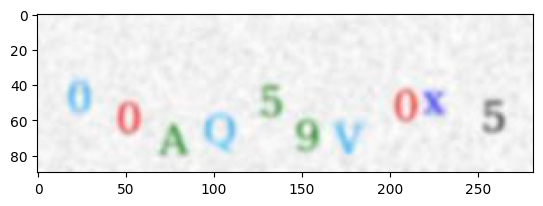

In [3]:
file_path = "../samples/type_2/00AQ59V0x5.jpg"
file_name = (file_path.split('/')[-1])[:-4]

img = cv2.imread(file_path)

plt.imshow(img)

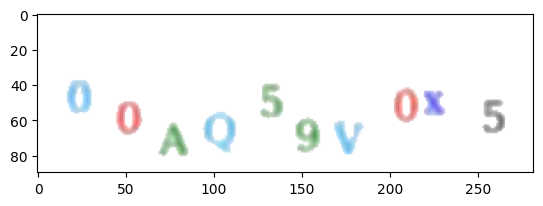

In [4]:
# make all gray pixel above 200 white
img[np.where((img > [200, 200, 200]).all(axis=2))] = [255, 255, 255]



plt.imshow(img)

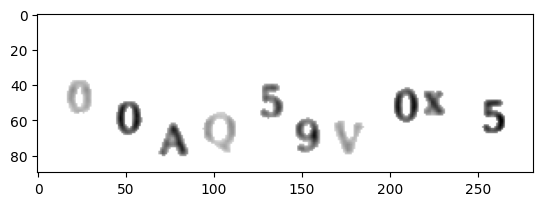

In [5]:
# convert to grayscale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

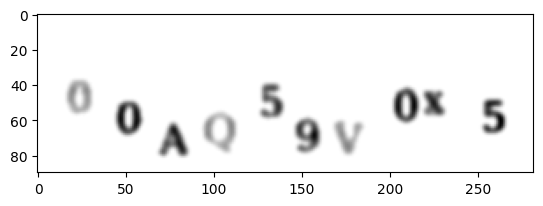

In [6]:
# blur image

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap='gray')

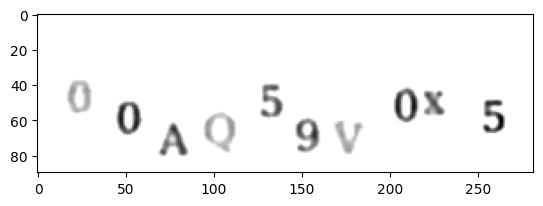

In [7]:
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blurred, -1, sharpen_kernel)

plt.imshow(sharpen, cmap='gray')

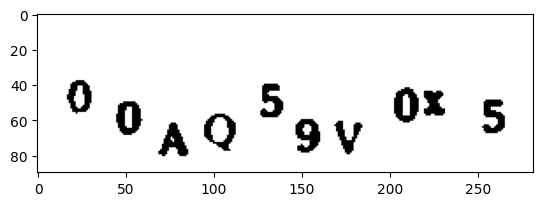

In [8]:
# threshold image
ret, thresh = cv2.threshold(sharpen, 220, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')

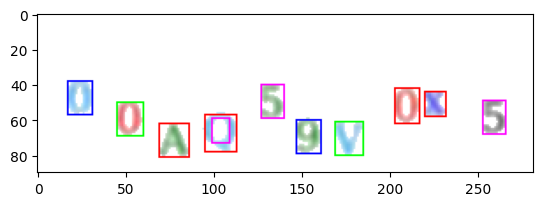

In [11]:
#img2 = img.copy()

mser = cv2.MSER_create()

regions, rects = mser.detectRegions(thresh)

# sort rectangles by left pixel
rects = sorted(rects, key=lambda x: x[0])

# remove rectangles contained in other rectangles

#da_accoppare = []
#for i, rect in enumerate(rects):
#    if i == 0: continue
#    if rect[0] >= rects[i-1][0] and rect[1] >= rects[i-1][1] and rect[0]+rect[2] <= rects[i-1][0]+rects[i-1][2] and rect[1]+rect[3] <= rects[i-1][1]+rects[i-1][3]:
#        da_accoppare.append(i)
#
#rects = np.delete(rects, da_accoppare, axis=0)
#
#
## subplot every rectangle
#for i, rect in enumerate(rects):
#
#
#    plt.subplot(1, len(rects), i + 1)
#    plt.imshow(thresh[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]], cmap='gray')
#    #plt.title(file_name[i])
#    plt.axis('off')
#
## show image
#plt.plot()

# draw rectangles on image
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 0, 0), (255, 0, 255), (255, 0, 255)]
im2 = img.copy()

for i, rect in enumerate(rects):
    cv2.rectangle(im2, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), colors[i % len(colors)], 1)

plt.imshow(im2)